# 의사결정나무(Decision Tree)

### 장단점
* 장점
    * 모델을 쉽게 설명할 수 있고, 시각화가 편하다.
    * 데이터의 스케일에 영향을 받지 않아 데이터의 정규화나 표준화 등의 전처리를 요구하지 않는다.
* 단점
    * 가지치기 방식에도 불구하고 과대적합의 가능성이 높아 일반화 성능이 우수하지 않다.

### 결정트리 생성하기
* 결정트리에서 학습의 의미는 '정답에 가장 빨리 도달하는 질문목록을 학습'하는 것이다.
* 분리규칙을 설정하는 분리기준은 목표변수가 이산형인지, 연속형인지에 따라 다르다.

#### 이산형 목표변수(분류분석)
* 기준값에 따른 분리기준
    * 카이제곱 통계량의 p-value : p-value가 가장 작은 예측변수과 그때의 최적분리에 의해 자식마디를 형성
    * 지니지수 : 지니지수를 감소시키는 예측변수와 그때의 최적분리에 의해 자식마디를 형성
    * 엔트로피지수 : 엔트로피지수가 가장 작은 예측변수와 그때의 최적분리에 의해 자식마디를 형성

#### 연속형 목표변수(회귀분석)
* 기준값에 따른 분리기준
    * 분산분석에서의 F통계량 : p-value가 가장 작은 예측변수과 그때의 최적분리에 의해 자식마디를 형성
    * 분산의 감소량 : 분산의 감소량을 최대화하는 기준의 최적분리에 의해 자식마디를 형성

### 결정트리 복잡도 제어
* 트리의 크기를 의사결정나무 모델의 복잡도라고 판단할 수 있다.
* 가지가 많으면 학습데이터는 최적화되지만, 평가데이터에는 예측력이 감소하는 과적합 문제가 발생할 수 있다.
* 이와 같은 상황을 방지하기 위해 가지치기를 이용하여 트리의 성장을 제한한다.
    * 가지치기 방식은 여러 가지가 있지만, scikit-learn에서 지원하는 방식은 사전가지치기(Pre-pruning)이다.
        * 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수를 지정한다.(하이퍼파라미터)

### 분류분석(목표변수가 이산형인 경우)

(700, 20) (300, 20) (700,) (300,)

=====

혼동행렬
 [[ 58  32]
 [ 65 145]]
정확도	67.67%
정밀도	81.92%
재현율	69.05%
f1_score	74.94%

=====

              precision    recall  f1-score   support

           0       0.47      0.64      0.54        90
           1       0.82      0.69      0.75       210

    accuracy                           0.68       300
   macro avg       0.65      0.67      0.65       300
weighted avg       0.71      0.68      0.69       300


=====



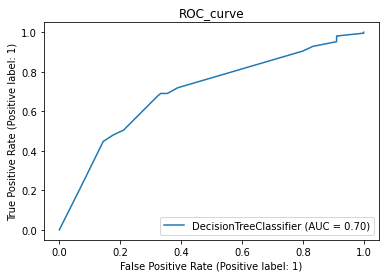

ROC_AUC_score :  0.7014550264550263


In [1]:
import pandas as pd

credit = pd.read_csv('./data/credit_final.csv')
credit.head(5)

y = credit.pop('Creditability')
x = credit

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2023, stratify= y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print('\n=====\n')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5, criterion= 'entropy')
clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print('혼동행렬\n', test_cm)
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('f1_score\t{}%'.format(round(test_f1*100, 2)))
print('\n=====\n')

# classification_report를 통해 결정트리의 분석결과를 확인할 수도 있다.
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)
print('\n=====\n')

# 예측결과에 대한 ROC-curve 그리기
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.title('ROC_curve')
plt.show()

r_a_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print('ROC_AUC_score : ', r_a_score)

In [2]:
# 트리를 생성하는 데 있어 중요한 변수가 무엇인지 확인해보기 위해 변수중요도 확인해보기
importances = pd.DataFrame(clf.feature_importances_)
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm, importances], axis = 1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances.sort_values('importances', ascending = False, ignore_index=False))

                           feature_nm  importances
0                     Account Balance     0.310592
1          Duration of Credit (month)     0.210752
4                       Credit Amount     0.110503
6        Length of current employment     0.092374
5                Value Savings/Stocks     0.086310
9                          Guarantors     0.035487
8                Sex & Marital Status     0.033532
12                        Age (years)     0.032996
11      Most valuable available asset     0.030504
10        Duration in Current address     0.029587
3                             Purpose     0.027362
7                 Instalment per cent     0.000000
2   Payment Status of Previous Credit     0.000000
13                 Concurrent Credits     0.000000
14                  Type of apartment     0.000000
15         No of Credits at this Bank     0.000000
16                         Occupation     0.000000
17                   No of dependents     0.000000
18                          Tel

In [4]:
# # 결정트리의 분류 의사결정 시각화해보기 (Graphviz)
# import numpy as np
# feature_names = feature_importances.feature_nm
# target_names = np.array(['0', '1'])

# !pip install pydot
# !pip install pydotplus
# !pip sudo install graphviz

# import pydot
# import pydotplus
# import graphviz
# from sklearn.tree import export_graphviz
# dt_dot_data = export_graphviz(clf, feature_names = feature_names,
#                               class_names = target_names,
#                               filled = True, rounded = True,
#                               special_characters = True)
# dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

# from IPython.display import Image
# Image(dt_graph.create_png())

---

### 회귀분석(목표변수가 연속형인 경우)

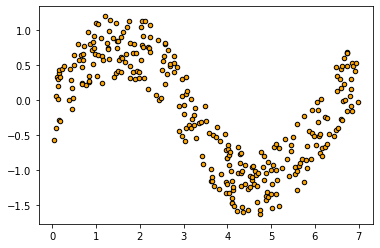

(210, 1) (90, 1) (210,) (90,)
                mse  rmse   mae
max_depth = 2  0.16   0.4  0.32
max_depth = 5  0.14  0.38  0.32


array([ 0.30503955,  0.64908796, -0.48127263, -0.51569191, -0.69836432,
       -0.24348377, -0.12645705, -0.5240229 , -1.33235109,  0.97615272,
       -0.66205936, -0.92478538,  0.39595008, -1.22942915,  0.77394806,
       -0.8415459 , -0.73775517,  0.02204846,  0.49385652,  0.40303018,
        0.75100774, -0.14453384,  0.52629407,  0.80189375,  0.66348954,
       -0.76762124, -0.93038042,  0.06327576, -0.51519713,  0.48128414,
        0.42287595, -0.62954168, -1.32282828,  0.33172777,  0.75250064,
        0.17551272, -1.22376649, -0.64054166,  0.39011846,  0.79595524,
       -0.22099035, -1.1533598 , -1.00875833,  0.44121652, -1.19936599,
       -0.80001262, -1.05197104, -1.52170247,  0.02073679, -1.0859046 ,
       -0.7210943 , -0.62979228, -1.03952193,  0.33952946, -0.425044  ,
       -0.82510838,  0.41494825,  0.70900642, -1.03334684,  1.12496536,
       -1.1649973 , -0.66350598, -0.85879824, -1.09429951, -0.49442862,
        1.09873008, -0.43756481, -1.46882358, -0.07924649, -0.91

In [104]:
# 임의 데이터 사용
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(7*np.random.rand(300, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()
y[::1] += 1*(0.3-np.random.rand(300))

plt.scatter(x, y, s=20, edgecolors='black', c='orange', label = 'data')
plt.show()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2023)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

from sklearn.metrics import mean_absolute_error, mean_squared_error
y_1 = regr_1.fit(x_train, y_train).predict(x_test)
y_2 = regr_2.fit(x_train, y_train).predict(x_test)
preds = [y_1, y_2]
weights = ['max_depth = 2', 'max_depth = 5']
evls = ['mse', 'rmse', 'mae']
results = pd.DataFrame(index = weights, columns = evls)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)

    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    results.loc[nm]['mae'] = round(mae, 2)

print(results)

y_test

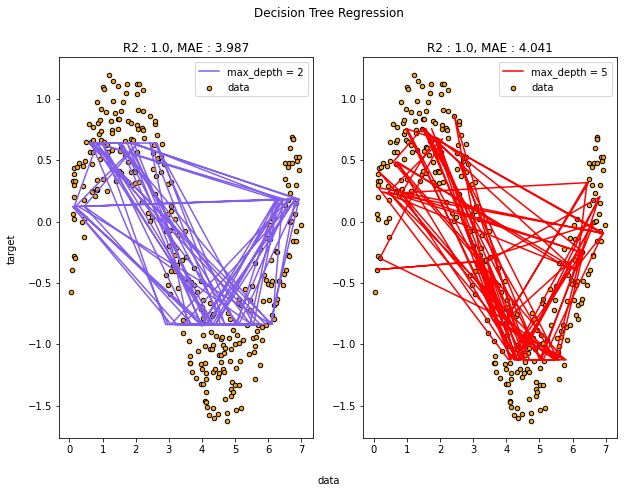

In [112]:
# 결정트리 예측결과 시각화해보기
regrs = [regr_1, regr_2]
depths = ['max_depth = 2', 'max_depth = 5']
model_color = ['#835eed', 'red']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 7))
for ix, regr in enumerate(regrs):
    pred = regr.fit(x_train, y_train).predict(x_test)
    r2 = regr.score(x_test, pred)
    mae = mean_absolute_error(x_test, pred)

    axes[ix].plot(x_test, pred, color=model_color[ix], label='{}'.format(depths[ix]))
    axes[ix].scatter(x, y, s=20, edgecolor='black', c='orange', label = 'data')
    axes[ix].legend(loc='upper right', ncol = 1)
    axes[ix].set_title('R2 : {r}, MAE : {m}'.format(r=round(r2, 3), m=round(mae, 3)))
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation = 'vertical')
fig.suptitle('Decision Tree Regression')
plt.show()